#ANALYSIS:
#1-In the Regression by Median Income & Mortality-Coronary Heart Disease of Ages 35-64 years, the coefficinet was -0.55128, which shows there exist inverse (moderate negative) relationship betweem both the variables (i-e. As the median income increases the chances of mortality by Coronary heart dissease declines within the sample of age 35-64 years). Further, the graph of regression also reveals the small error variance as the scatter dots are close to regression line. Moreover, In the same age category, similar results were found in the Mortality by storke having coefficient of -0.56222 with moderate negative relationhsip and small error variance.

#2- In the Regression by Median Income & Mortality-Coronary Heart Disease and Stroke of Ages 65 yeras and older, the coefficinet was -0.31415 and -0.30629 respectively, The slope is downward slopping which shows there exist inverse relationship betweem both the variables but the relationship is week as it is cloer to 0 (i-e. As the median income increases the chances of mortality by Coronary heart dissease and stroke declines within the sample of ages 65 years and older). Further, the graphs of regression also reveals the large error variance as the scatter dots are away from to regression line.




# Cardiovascular Disease vs Determinants

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Resource files
CD_data_path = "Resources/Cardiovascular_Disease_Data.csv"
census_data_path = "Resources/2018_Census_Data.csv"

# Read the Cardiovascular Disease data and Census data
CD_data = pd.read_csv(CD_data_path)
census_data = pd.read_csv(census_data_path)

# State name to abbreviated version
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

# Preparing data- Creating a clean DataFrame by he desired parameters.
# Cleaning Cardiovascular Data
CD_data = CD_data[CD_data["Year"]=="2018"] # Grabbing rows with the Year 2018 only
CD_data = CD_data[["Year", 
                   "LocationAbbr", 
                   "LocationDesc", 
                   "Topic", 
                   "Data_Value", 
                   "Stratification1"]] # Grabbing relevant columns
CD_data.columns = ["Year", 
                   "State", 
                   "County", 
                   "Disease Type", 
                   "Mortality per 100k", 
                   "Age Group"] # Renaming columns
CD_data["County, State"] = CD_data["County"] + " County, " + CD_data["State"] # Create a column that will be used to merge with other dataset
CD_data = CD_data[["Year", "County, State", "Disease Type", "Mortality per 100k", "Age Group"]]

# Cleaning Census Data
census_data = census_data[["STATE",
                           "COUNTY",
                           "ACS_MEDIAN_HH_INC",
                           "ACS_PCT_COLLEGE_ASSOCIATE_DGR",
                           "ACS_PCT_BACHELOR_DGR",
                           "ACS_PCT_GRADUATE_DGR",
                           "ACS_PCT_HS_GRADUATE",
                           "ACS_PCT_LT_HS",
                           "ACS_PCT_MEDICARE_ONLY",
                           "ACS_PCT_PRIVATE_ANY",
                           "ACS_PCT_UNINSURED"]] # Grabbing relevant columns
census_data.columns = ["State",
                       "County",
                       "County Median Income",
                       "% College/Associate's Degree",
                       "% Bachelor Degree",
                       "% Graduate Degree",
                       "% Only HS Degree",
                       "% less than a HS Degree",
                       "% Medicare Only",
                       "% Private Insurance Only",
                       "% Uninsured"] # Renaming columns
census_data["County, State"] = census_data["County"] + ", " + census_data["State"].replace(us_state_to_abbrev) # Create a column that will be used to merge with other dataset
census_data = round(census_data.groupby("County, State").mean(), 3) # Average rows with same counties

df = pd.merge(CD_data, census_data, how = "left", left_on = "County, State", right_index = True).dropna(axis=0)
df.head()

C:\Users\dryas\AppData\Local\Temp\ipykernel_16320\1343742200.py:12: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  CD_data = pd.read_csv(CD_data_path)
C:\Users\dryas\AppData\Local\Temp\ipykernel_16320\1343742200.py:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  census_data = pd.read_csv(census_data_path)
C:\Users\dryas\AppData\Local\Temp\ipykernel_16320\1343742200.py:118: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  census_data = round(census_data.groupby("County, State").mean(), 3) # Average rows with same counties


,Year,"County, State",Disease Type,Mortality per 100k,Age Group,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured
21,2018,"Autauga County, AL",Stroke,23.5,Ages 35-64 years,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
42,2018,"Autauga County, AL",Coronary Heart Disease,87.9,Ages 35-64 years,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
62,2018,"Autauga County, AL",Stroke,368.6,Ages 65 years and older,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
82,2018,"Autauga County, AL",Coronary Heart Disease,689.9,Ages 65 years and older,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979
115,2018,"Baldwin County, AL",Stroke,18.1,Ages 35-64 years,56782.71,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276


## Exploratory Data Analysis (EDA)

### Summary Statistics for Mortality Rate by Age Group and Disease Type

In [6]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
]

df_stats = df.groupby(["Disease Type", "Age Group"])["Mortality per 100k"].agg(func=stats) # Generating stats dataframe
df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
df_stats

Mean  Median  \
Disease Type           Age Group                                     
Coronary Heart Disease Ages 35-64 years          70.898076    64.2   
                       Ages 65 years and older  628.655387   605.9   
Stroke                 Ages 35-64 years          16.864551    15.3   
                       Ages 65 years and older  267.846506   262.2   

                                                       Std  Minimum  Maximum  
Disease Type           Age Group                                              
Coronary Heart Disease Ages 35-64 years          31.149991     13.3    300.7  
                       Ages 65 years and older  175.914496    207.1   1609.8  
Stroke                 Ages 35-64 years           6.306468      5.6     48.1  
                       Ages 65 years and older   48.985936    107.9    596.4

### Distribution of Mortality Rate by Age Group and Disease Type

#### Disease Type: Coronary Heart Disease

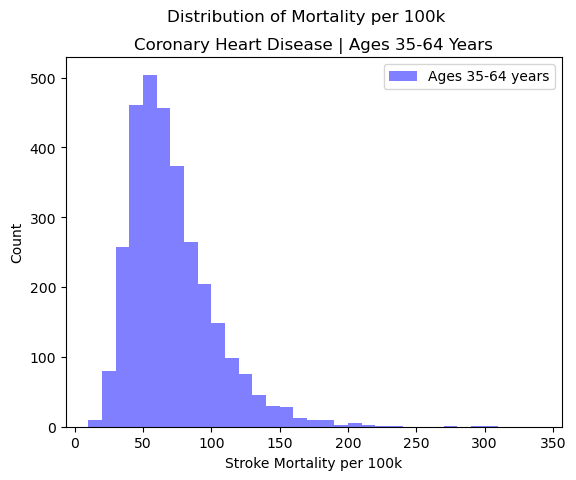

In [73]:
# Generating a histogram plot showing the Distribution of Mortality count by Coronary Heart Disease for the sample Age 35-64 years.
bins = list(range(10, 350, 10))
plt.hist(df[(df["Age Group"] == "Ages 35-64 years") & (df["Disease Type"] == "Coronary Heart Disease")]["Mortality per 100k"], bins, alpha = 0.5, color = "blue", label = "Ages 35-64 years")
plt.xlabel("Stroke Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Coronary Heart Disease | Ages 35-64 Years")
plt.legend()

#### Disease Type: Stroke

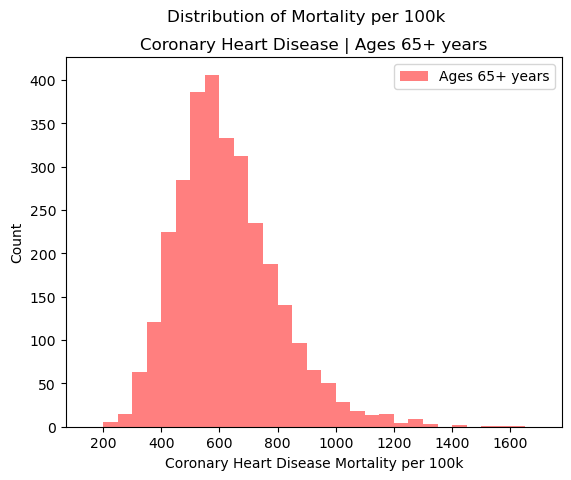

In [89]:
# Generating a histogram plot showing the Distribution of Mortality count by Coronary Heart Disease for the sample Ages 65+ years.
bins = list(range(150, 1750, 50))
plt.hist(df[(df["Age Group"] == "Ages 65 years and older") & (df["Disease Type"] == "Coronary Heart Disease")]["Mortality per 100k"], bins, alpha = 0.5, color = "red", label = "Ages 65+ years")
plt.xlabel("Coronary Heart Disease Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Coronary Heart Disease | Ages 65+ years")
plt.legend()

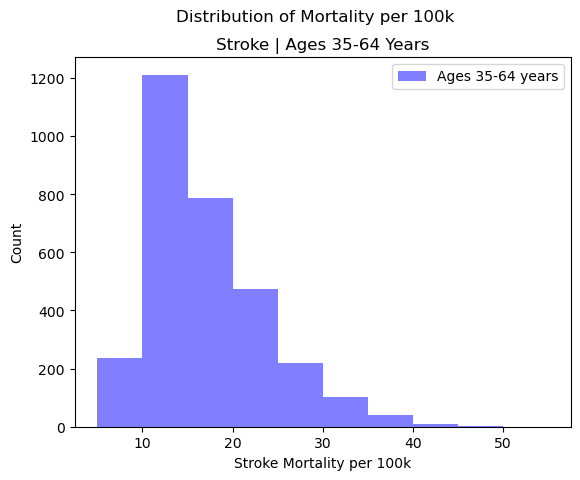

In [90]:
# Generating a histogram plot showing the Distribution of Mortality count for the sample Age 35-64 years by Stroke.
bins = list(range(5, 60, 5))
plt.hist(df[(df["Age Group"] == "Ages 35-64 years") & (df["Disease Type"] == "Stroke")]["Mortality per 100k"], bins, alpha = 0.5, color = "blue", label = "Ages 35-64 years")
plt.xlabel("Stroke Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Stroke | Ages 35-64 Years")
plt.legend()

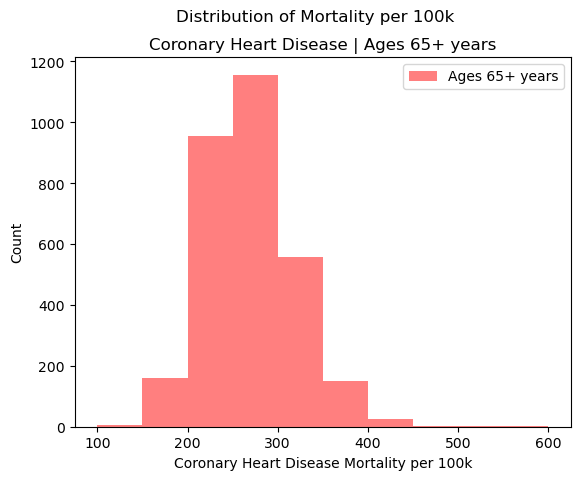

In [72]:
# Generating a histogram plot showing the Distribution of Mortality count for the sample Ages 65+ years.
bins = list(range(100, 650, 50))
plt.hist(df[(df["Age Group"] == "Ages 65 years and older") & (df["Disease Type"] == "Stroke")]["Mortality per 100k"], bins, alpha = 0.5, color = "red", label = "Ages 65+ years")
plt.xlabel("Coronary Heart Disease Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Stroke | Ages 65+ years")
plt.legend()

### Summary Statistics for County Median Income

In [190]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
        ]

df_stats = df[["County Median Income"]].agg(func=stats).transpose() # Generating stats dataframe
df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
df_stats

,Mean,Median,Std,Minimum,Maximum
Median Income,52286.678756,50383.75,14119.619711,20356.0,134712.703


### Distribution of County Median Income

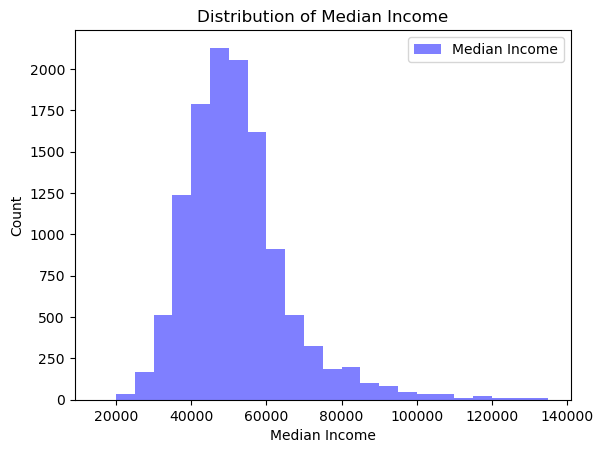

In [95]:
# Generating a histogram plot showing the Distribution of population by County Median Income.
bins = list(range(15000, 140000, 5000))
plt.hist(df["County Median Income"], bins, alpha = 0.5, color = "blue", label = "County Median Income")
plt.xlabel("County Median Income")
plt.ylabel("Count")
plt.title("Distribution of Median Income")
plt.legend()

### Summary Statistics for Education

In [212]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
        ]

df_stats = df[["% College/Associate's Degree", 
               "% Bachelor Degree", 
               "% Graduate Degree", 
               "% Only HS Degree", 
               "% less than a HS Degree"
              ]].agg(func=stats).transpose() # Generating stats dataframe
df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
df_stats

,Mean,Median,Std,Minimum,Maximum
% College/Associate's Degree,30.736011,30.622,5.095445,11.210,47.980
% Bachelor Degree,13.772744,12.768,5.486197,2.465,46.067
% Graduate Degree,7.476385,6.139,4.279798,0.580,40.300
% Only HS Degree,34.450530,34.799,7.130146,7.741,55.410
% less than a HS Degree,13.564333,12.331,6.207610,1.410,47.637


### Distribution of Education

Text(0, 0.5, 'Percent')

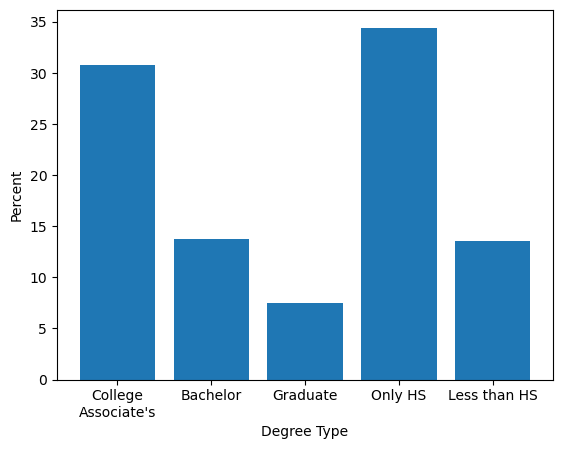

In [213]:
# A bar plot showing the percentage of sample population by Education degree type.
plt.bar(df_stats.index, df_stats["Mean"])
plt.xticks([0, 1, 2, 3, 4], ["College\nAssociate's", "Bachelor", "Graduate", "Only HS", "Less than HS"])
plt.xlabel("Degree Type")
plt.ylabel("Percent")

### Summary Statistics for Insurance

In [214]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
        ]

df_stats = df[["% Medicare Only", 
               "% Private Insurance Only", 
               "% Uninsured"
              ]].agg(func=stats).transpose() # Generating stats dataframe
df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
df_stats

,Mean,Median,Std,Minimum,Maximum
% Medicare Only,6.063525,5.789,1.914337,1.512,16.145
% Private Insurance Only,57.833914,58.309,10.414717,12.940,85.620
% Uninsured,9.989589,9.114,4.913097,1.686,42.380


### Distribution of Insurance

Text(0, 0.5, 'Percent')

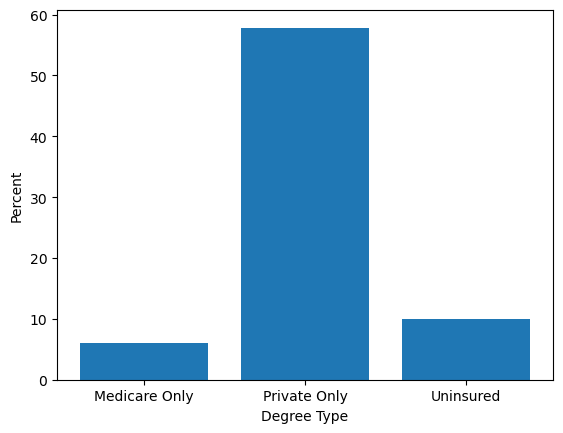

In [216]:
# A bar plot showing the percentage of type of medical insurance.
plt.bar(df_stats.index, df_stats["Mean"])
plt.xticks([0, 1, 2], ["Medicare Only", "Private Only", "Uninsured"])
plt.xlabel("Degree Type")
plt.ylabel("Percent")

## Visual Analysis: Scatterplots & Regression Line

### Compared to Median

-0.0012174049081589027
The correlation coefficient between Median Income & Mortality-Coronary Heart Disease of Ages 35-64 years is -0.55128


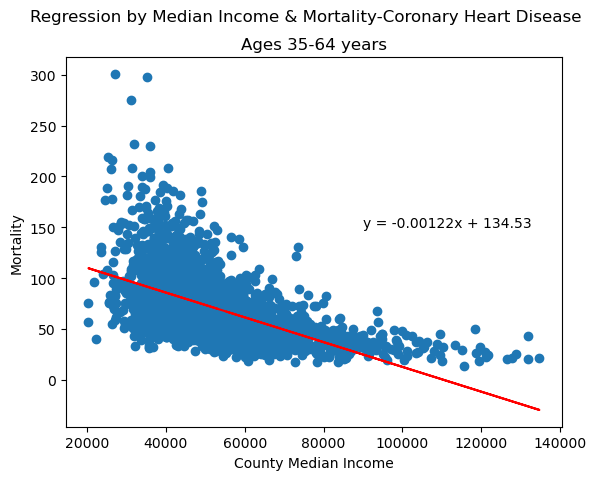

In [26]:
# Calculating the correlation coefficient and linear regression model 

data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")]
x = data["County Median Income"]
y = data["Mortality per 100k"]

#creating linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

#y = mx + b
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (90000, 150),fontsize=10)

plt.xlabel("County Median Income")
plt.ylabel("Mortality")
plt.suptitle("Regression by Median Income & Mortality-Coronary Heart Disease")
plt.title("Ages 35-64 years")

print(slope)
print(f"The correlation coefficient between Median Income & Mortality-Coronary Heart Disease of Ages 35-64 years is {round(rvalue,5)}")

-0.00390901209383577
The correlation coefficient between Median Income & Mortality-Coronary Heart Disease of Ages 65 years and older is -0.31415


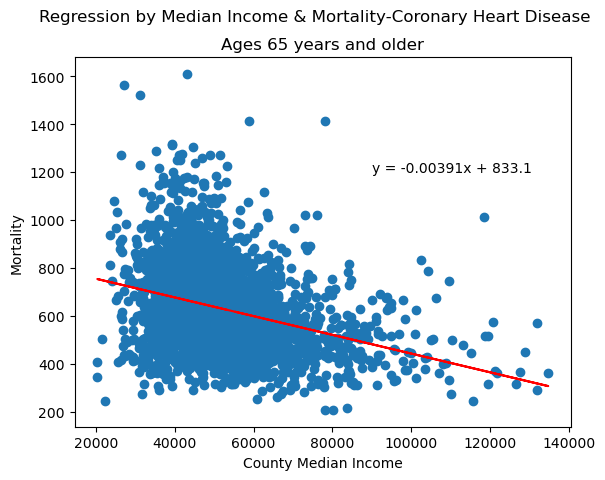

In [28]:
# Calculating the correlation coefficient and linear regression model 

data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 65 years and older")]
x = data["County Median Income"]
y = data["Mortality per 100k"]

#creating linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

#y = mx + b
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (90000, 1200),fontsize=10)

plt.xlabel("County Median Income")
plt.ylabel("Mortality")
plt.suptitle("Regression by Median Income & Mortality-Coronary Heart Disease")
plt.title("Ages 65 years and older")

print(slope)
print(f"The correlation coefficient between Median Income & Mortality-Coronary Heart Disease of Ages 65 years and older is {round(rvalue,5)}")

-0.0002513633848918949
The correlation coefficient between Median Income & Mortality by Stroke of Ages 35-64 years is-0.56222


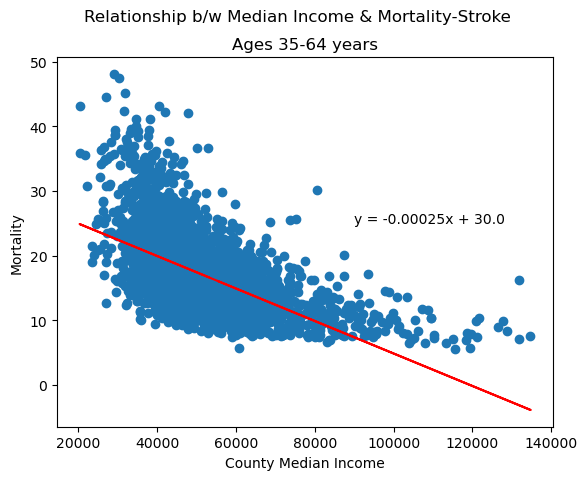

In [31]:
# Calculating the correlation coefficient and linear regression model 
data = df[(df["Disease Type"] == "Stroke") & (df["Age Group"] == "Ages 35-64 years")]
x = data["County Median Income"]
y = data["Mortality per 100k"]

#creating linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

#y = mx + b
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (90000, 25),fontsize=10)

plt.xlabel("County Median Income")
plt.ylabel("Mortality")
plt.suptitle("Relationship b/w Median Income & Mortality-Stroke")
plt.title("Ages 35-64 years")
    
print(slope)
print(f"The correlation coefficient between Median Income & Mortality by Stroke of Ages 35-64 years is{round(rvalue,5)}")

-0.0010612815091176706
The correlation coefficient between Median Income & Mortality-Stroke of Ages 65 years and older is -0.30629


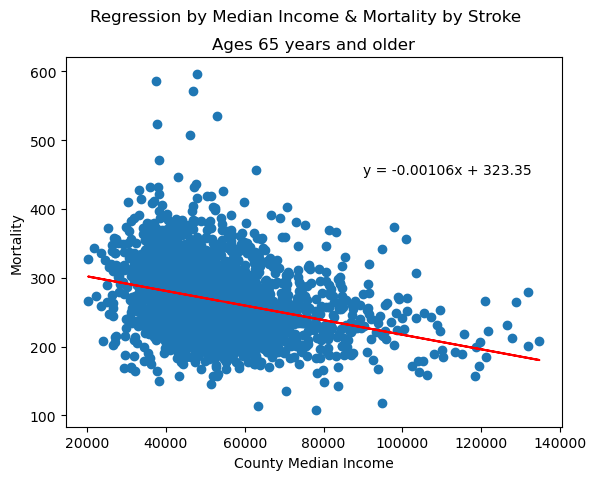

In [32]:
# Calculating the correlation coefficient and linear regression model 

data = df[(df["Disease Type"] == "Stroke") & (df["Age Group"] == "Ages 65 years and older")]
x = data["County Median Income"]
y = data["Mortality per 100k"]

#creating linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

#y = mx + b
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (90000, 450),fontsize=10)
plt.xlabel("County Median Income")
plt.ylabel("Mortality")
plt.suptitle("Regression by Median Income & Mortality by Stroke")
plt.title("Ages 65 years and older")

print(slope)
print(f"The correlation coefficient between Median Income & Mortality-Stroke of Ages 65 years and older is {round(rvalue,5)}")

### Compared to Education

In [3]:
# Calculating the correlation coefficient and linear regression model for Education Variable and Mortality by Coronary Heart Disease

data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")]
x = data["% College/Associate's Degree"]
y = data["Mortality per 100k"]

#creating linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

#y = mx + b
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (90000, 150),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

NameError: name 'df' is not defined